## __Task 8: Clustering with K-Means__

### __Summary Flow__

|Step |	Description|
|------|-----------|    
|1️⃣	|Load dataset|
|2️⃣	|Preprocess (feature selection, scaling)|
|3️⃣	|Elbow method to find K|
|4️⃣	|Fit KMeans and label clusters|
|5️⃣	|Interpret cluster meaning|
|6️⃣	|Visualize (optional PCA)|
|7️⃣	|Predict new points|
|8️⃣	|Evaluate (e.g., Silhouette score)|

### __Importing necessary libraries__

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### __Load Dataset__

In [18]:
df=pd.read_csv("D:/AI ML Intern Elevate Labs Benglore/Task 8 K means Clustering/Mall_Customers.csv")

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### __Preprocess (feature selection, scaling)__

In [22]:
X=df.drop(['CustomerID','Gender'],axis=1)

In [24]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [55]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled.shape

(200, 3)

### __Elbow method to find K__

In [95]:
import warnings
warnings.filterwarnings("ignore")

k_range = range(1,11)
inertia=[]
centroids=[]

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    centroids.append(km.cluster_centers_)
    
# print(inertia)
# print("___"*10)
# print(centroids)

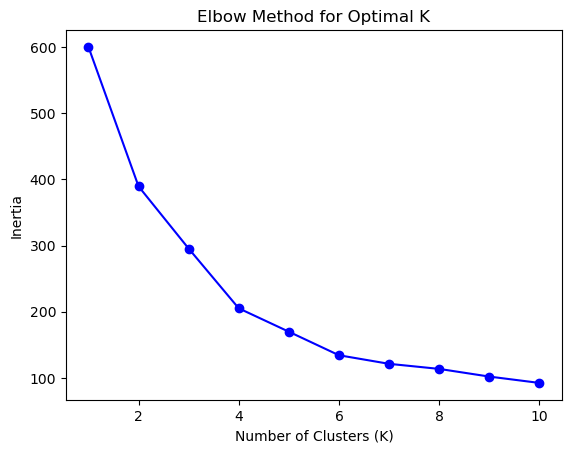

In [48]:
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

- "Elbow" point — where the inertia starts to decrease more slowly.
- The most visible “elbow” occurs at K = 5, where the rate of inertia drop significantly slows down after that.
 

### __Fit KMeans and label clusters__

In [143]:
kmeans=KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit_predict(X_scaled)
print(labels)
df["Cluster"]=labels
df

[2 2 3 2 2 2 3 2 0 2 0 2 0 2 3 2 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 3 2 0 2 0 2 0 2 0 3 3 3 0 2 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 1 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
0,1,Male,19,15,39,2,Impulsive Young Shoppers
1,2,Male,21,15,81,2,Impulsive Young Shoppers
2,3,Female,20,16,6,3,Standard Young Adults
3,4,Female,23,16,77,2,Impulsive Young Shoppers
4,5,Female,31,17,40,2,Impulsive Young Shoppers
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Target Premium Customers
196,197,Female,45,126,28,4,Cautious Wealthy Adults
197,198,Male,32,126,74,1,Target Premium Customers
198,199,Male,32,137,18,4,Cautious Wealthy Adults


In [71]:
cluster_profile = df.select_dtypes(include='number').groupby('Cluster').mean()
print(cluster_profile)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         68.775862  55.275862           47.620690               41.706897
1        161.025000  32.875000           86.100000               81.525000
2         23.461538  25.769231           26.115385               74.846154
3         86.377778  26.733333           54.311111               40.911111
4        166.870968  44.387097           89.774194               18.483871


In [77]:
# Step 1: Create a mapping dictionary
cluster_labels = {
    0: 'Average Senior Spenders',
    1: 'Target Premium Customers',
    2: 'Impulsive Young Shoppers',
    3: 'Standard Young Adults',
    4: 'Cautious Wealthy Adults'
}

# Step 2: Apply the label to each row based on its cluster
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
0,1,Male,19,15,39,2,Impulsive Young Shoppers
1,2,Male,21,15,81,2,Impulsive Young Shoppers
2,3,Female,20,16,6,3,Standard Young Adults
3,4,Female,23,16,77,2,Impulsive Young Shoppers
4,5,Female,31,17,40,2,Impulsive Young Shoppers
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Target Premium Customers
196,197,Female,45,126,28,4,Cautious Wealthy Adults
197,198,Male,32,126,74,1,Target Premium Customers
198,199,Male,32,137,18,4,Cautious Wealthy Adults


### __Visualize (optional PCA)__

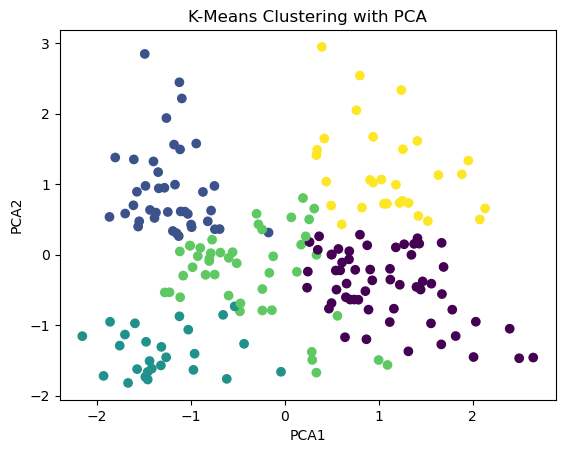

In [121]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### __Predict new points__

In [106]:
new_data = scaler.transform([[30,60,70]])  # Scale it like training data
predicted_cluster = kmeans.predict(new_data)
print(f"The Cluster group for given input is {cluster_labels[predicted_cluster[0]]}")

The Cluster group for given input is Target Premium Customers


### __Evaluate (e.g., Silhouette score)__

In [112]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_scaled,labels))

0.40846873777345605


In [50]:
from sklearn.metrics import silhouette_score
scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

scores

[0.33547192894004574,
 0.3579234303882264,
 0.4039582785148566,
 0.40846873777345605,
 0.43106526216603014,
 0.410091114520974,
 0.3673663165322295,
 0.37442148555078425,
 0.36186970479722974]